In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


In [4]:
## Basic statistics of the data ## 
# Load the cleaned dataset
df = pd.read_csv('../data/Eye-tracking Output/cleaned_data.csv')

# Creating a subset with unique participants
unique_participants_df = df.drop_duplicates(subset='Participant')

# Calculate the mean age of unique participants
mean_age = unique_participants_df['Age'].mean()
print("Mean age of unique participants:", round(mean_age, 2))

# Count unique participants for each gender
unique_gender_counts = unique_participants_df.groupby('Gender')['Participant'].nunique()
print("\nUnique participants by gender:")
print(unique_gender_counts)

# Count unique participants for each class (ASD or TD)
unique_class_counts = unique_participants_df.groupby('Class')['Participant'].nunique()
print("\nUnique participants by class (ASD or TD):")
print(unique_class_counts)

# CARS mean score for ASD participants
as_participants = unique_participants_df[unique_participants_df['Class'] == 'ASD']
mean_cars_score = as_participants['CARS Score'].mean()
print("\nMean CARS score for ASD participants:", round(mean_cars_score, 2))

# Total number of unique participants
n_participants = unique_participants_df['Participant'].nunique()
print("\nTotal unique participants:", n_participants)

# Number of unique stimuli (consisting of videos and photos)
n_unique_stimuli = df['Stimulus'].nunique()
print("Number of unique stimuli:", n_unique_stimuli)

# General statistics of the data
df.info()



Mean age of unique participants: 7.8

Unique participants by gender:
Gender
F    20
M    36
Name: Participant, dtype: int64

Unique participants by class (ASD or TD):
Class
ASD    27
TD     29
Name: Participant, dtype: int64

Mean CARS score for ASD participants: 32.65

Total unique participants: 56
Number of unique stimuli: 114
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905519 entries, 0 to 905518
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Participant                   905519 non-null  int64  
 1   Trial                         905519 non-null  object 
 2   Stimulus                      905519 non-null  object 
 3   Time.s                        905519 non-null  float64
 4   RecordingTime [ms]            905519 non-null  float64
 5   Export Start Trial Time [ms]  905519 non-null  float64
 6   Export End Trial Time [ms]    905519 non-null  float64
 7   Point of Rega

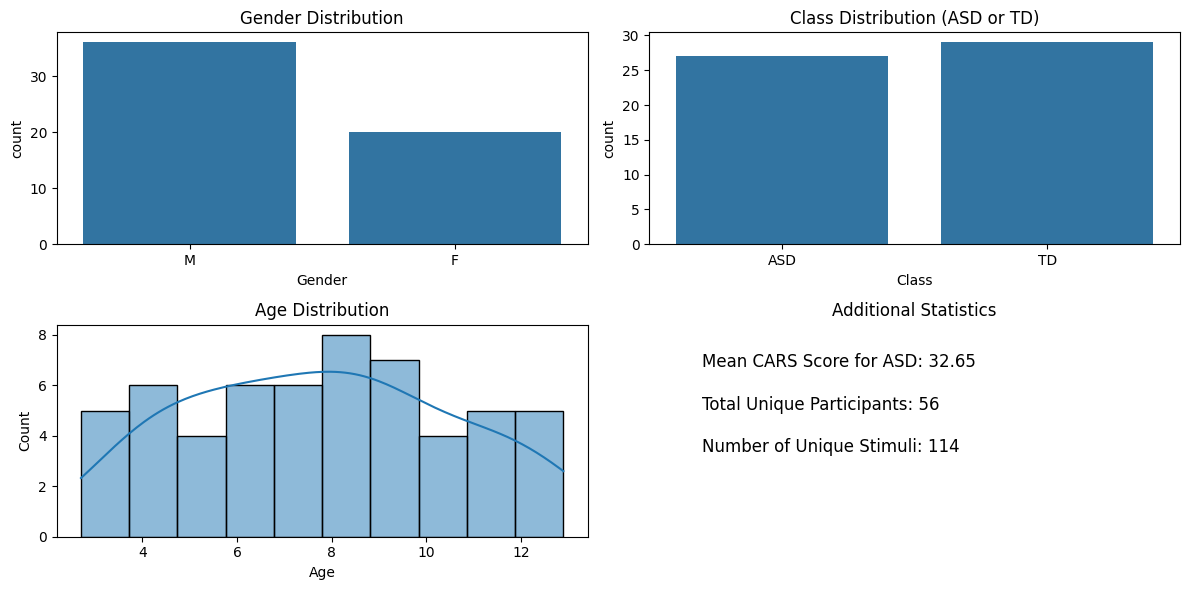

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Gender Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=unique_participants_df, x='Gender')
plt.title('Gender Distribution')

# Class Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=unique_participants_df, x='Class')
plt.title('Class Distribution (ASD or TD)')

# Age Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=unique_participants_df, x='Age', bins=10, kde=True)
plt.title('Age Distribution')

# Textual Data
plt.subplot(2, 2, 4)
plt.axis('off')
plt.text(0.1, 0.8, f"Mean CARS Score for ASD: {mean_cars_score:.2f}", fontsize=12)
plt.text(0.1, 0.6, f"Total Unique Participants: {n_participants}", fontsize=12)
plt.text(0.1, 0.4, f"Number of Unique Stimuli: {n_unique_stimuli}", fontsize=12)
plt.title('Additional Statistics')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Assuming unique_participants_df, mean_cars_score, n_participants, and n_unique_stimuli are already defined

# Creating a dictionary for the summary table
summary_data = {
    "Statistic": [
        "Mean Age of Participants",
        "Gender Distribution - Male",
        "Gender Distribution - Female",
        "Class Distribution - ASD",
        "Class Distribution - TD",
        "Mean CARS Score for ASD",
        "Total Unique Participants",
        "Number of Unique Stimuli"
    ],
    "Value": [
        f"{mean_age:.2f} years",
        f"{unique_gender_counts.get('M', 0)}",
        f"{unique_gender_counts.get('F', 0)}",
        f"{unique_class_counts.get('ASD', 0)}",
        f"{unique_class_counts.get('TD', 0)}",
        f"{mean_cars_score:.2f}",
        f"{n_participants}",
        f"{n_unique_stimuli}"
    ]
}

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary table
print(summary_df)


                      Statistic       Value
0      Mean Age of Participants  7.80 years
1    Gender Distribution - Male          36
2  Gender Distribution - Female          20
3      Class Distribution - ASD          27
4       Class Distribution - TD          29
5       Mean CARS Score for ASD       32.65
6     Total Unique Participants          56
7      Number of Unique Stimuli         114


In [82]:
## a lil plotting for the lads ## 

import os

import time
from IPython.display import clear_output


def progress_bar(i, my_list):
    i+=1
    length = len(my_list)
    perc_len = 100 / length
    sub = i * perc_len % 10
    i_of_100 = i * perc_len - sub
    num = int(i_of_100 / 10)
    num_of_10 = int(10 - i_of_100 / 10)
    clear_output(wait=True)
    print ("Progress:")
    print(round(perc_len*i, 1),"/100" , "[" ,num * "-", num_of_10 * " ", "]")
    time.sleep(1)


path = "../data/gaze_plots"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:

   # Create a new directory if it does not exist
   os.makedirs(path)
   print("gaze_plots folder created")

# Load your dataset
df = pd.read_csv('../data/Eye-tracking Output/cleaned_data.csv')

# Convert columns to numeric type
df[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']] = df[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']].apply(pd.to_numeric, errors='coerce')

# Loop through each diagnosis and stimulus to create separate plots
for diagnosis in df['Class'].unique():
    for stimulus in df['Stimulus'].unique():
        # Filter the dataset for the current diagnosis and stimulus
        df_filtered = df[(df['Class'] == diagnosis) & (df['Stimulus'] == stimulus)]
        
        # We know from the data collection that the screen size was 1280 x 1024 pixels and we will remove any data points outside of this range
        df_filtered = df_filtered[(df_filtered['Point of Regard Left X [px]'] >= 0) & (df_filtered['Point of Regard Left X [px]'] <= 1280)]
        
        # Normalize data
        df_filtered[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']] = (df_filtered[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']] - df_filtered[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']].min()) / (df_filtered[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']].max() - df_filtered[['Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]']].min())
        
# Set the style of the seaborn plot
sns.set(style="whitegrid")



# Loop through each diagnosis and stimulus to create separate plots
for diagnosis in df['Class'].unique():
    for i, stimulus in enumerate(df['Stimulus'].unique()): #enumerate for the progressbar
        # Filter the dataset for the current diagnosis and stimulus
        df_filtered = df[(df['Class'] == diagnosis) & (df['Stimulus'] == stimulus)]
        
        plt.figure(figsize=(10, 5))
        
        # Plotting gaze points for the left eye
        sns.kdeplot(x='Point of Regard Left X [px]', y='Point of Regard Left Y [px]', 
                    data=df_filtered, color='blue', fill=True)
        
        # Plotting gaze points for the right eye
        sns.kdeplot(x='Point of Regard Right X [px]', y='Point of Regard Right Y [px]', 
                    data=df_filtered, color='red', fill=True)
        
        # Add a title to the plot
        plt.title(f'Gaze Plot for {diagnosis} and {stimulus}')
        
        # Invert the y-axis
        plt.gca().invert_yaxis()
        
        # Save the plot wtih the diagnosis and stimulus in the filename
        plt.savefig(f'../data/gaze_plots/{diagnosis} - {stimulus}.png')

        progress_bar(i, df['Stimulus'].unique())
        
    



